# Part 2

## The following jupyter notebook contains code pertaining to Part 2 of Case Study 2

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## The data from the computer is read into the pandas dataframe df

In [2]:
df = pd.read_csv('C:/Users/Venkata Saketh Ch/Desktop/Healthcare/Case Study 2/Heart.csv')

# Data Pre-processing

In [3]:
# Replacing the missing values with NaN and dropping the corresponding rows containing the missing values
df.replace('?', np.nan, inplace=True)
df.dropna(axis=0, inplace=True)
df.reset_index(drop = True, inplace = True)

In [4]:
# Converting the datatypes of various columns to the required types
df['Ca'] = pd.to_numeric(df['Ca'], errors='coerce')
df['Thal'] = pd.to_numeric(df['Thal'], errors='coerce')
df[['Age', 'Sex', 'Fbs', 'Exang', 'Ca']] = df[['Age', 'Sex', 'Fbs', 'Exang', 'Ca']].astype(int)
df[['Trestbps', 'Chol', 'Thalach', 'Oldpeak']] = df[['Trestbps', 'Chol', 'Thalach', 'Oldpeak']].astype(float)

In [5]:
# Converting the response variable Num to have only two categories 0 and 1-4
df['Num'].replace(to_replace=[1, 2, 3, 4], value=1, inplace=True)

In [74]:
df.shape

(297, 15)

## Data Attributes

### The given dataset has the following attributes:
* Age: in years   
* Sex: 0=female; 1=male    
* Cp: chest pain type (1=typical, 2=atypical, 3=non-anginal pain, 4=asymptomatic)   
* Trestbps: resting blood pressure (mm Hg)
* Chol: serum cholestoral (mg/dl)      
* Fbs: fasting blood sugar>120 mg/dl (0=false, 1=true)       
* Restecg: Resting ECG results (0 = normal, 1=ST-T wave abnormality, 2=probable or definite left ventricle hypertrophy)  
* Thalach: Maximum heart rate acheived   
* Exang: Exercise induced angina (0=no, 1=yes)    
* Oldpeak = ST depression induced by exercise relative to rest   
* Slope: the slope of the peak exercise ST segment (1=upsloping, 2=flat, 3=downsloping)      
* Ca: number of major vessels (0-3) colored by fluoroscopy        
* Thal: 3 = normal; 6 = fixed defect; 7 = reversible defect     
* Num (the predicted attribute): diagnosis of heart disease (angiographic disease status) 0: < 50% diameter narrowing; 1-4: > 50% diameter narrowing


###  We see that 'Age',  'Trestbps', 'Chol', 'Thalach', 'Oldpeak', 'Ca' are the only continuous attributes in the dataset and we use these for clustering.

### We create the dataframe X which contains the attributes we want to use for clustering.

In [6]:
X = df[['Age','Trestbps', 'Chol', 'Thalach', 'Oldpeak', 'Ca']]

## Normalizing the continuous variables

In [9]:
# Creating the normalize function
def normalize(df, toNormalize): 
    result = df.copy()
    for item in df.columns:
        if (item in toNormalize):
            max_value = df[item].max()
            min_value = df[item].min()
            result[item] = (df[item] - min_value) / (max_value - min_value)
    return result

In [10]:
toNormalize = ['Age', 'Trestbps', 'Chol', 'Thalach', 'Oldpeak', 'Ca'] 
X_norm = normalize(X, toNormalize)
X_norm = X_norm.dropna()

# K-Means Clustering

### Performing K-Means clustering with number of clusters K = 2

In [23]:
# Performing K-Means Clustering using number of clusters K=2
from sklearn.cluster import KMeans

km_2 = KMeans(n_clusters=2, init='random', n_init=100, max_iter=100)
y_km = km_2.fit_predict(X_norm)

### Printing the centroid of the 2 clusters formed

In [24]:
print(km_2.cluster_centers_)  

[[0.64669244 0.37337094 0.29621522 0.50098371 0.26887263 0.60137457]
 [0.4765625  0.34698113 0.26776256 0.64801527 0.12241935 0.04333333]]


### Cluster Results

In [25]:
labels = km_2.predict(X_norm)
clusters = {}
n = 0
pat_obs = list(range(1,298))
for item in labels:
        if item in clusters:
            clusters[item].append(pat_obs[n])
        else:
            clusters[item] = [pat_obs[n]]
        n +=1

In [26]:
for item in clusters:
    print("\n")
    print ("Cluster ", item )
    for i in clusters[item]:
        print (i, end = " ")



Cluster  1
1 4 5 6 8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 26 27 28 29 30 33 34 35 36 37 40 42 44 45 47 48 50 51 52 53 54 57 58 59 61 62 64 67 68 69 70 71 75 76 79 80 81 82 83 84 85 86 87 88 89 90 93 94 95 98 99 100 101 102 105 106 107 109 110 112 113 115 116 117 122 123 125 128 129 130 131 132 133 134 135 136 138 139 140 141 142 143 144 145 147 148 149 150 151 152 156 160 162 163 165 166 167 168 170 171 172 177 179 182 183 185 187 189 192 195 196 197 198 199 200 201 202 205 206 207 208 209 210 212 213 214 215 217 218 219 220 223 224 225 228 229 232 234 235 236 237 238 239 240 242 243 244 245 247 248 251 252 253 255 256 257 258 260 261 263 265 266 268 270 272 274 275 276 278 280 281 284 285 286 287 288 290 291 293 294 297 

Cluster  0
2 3 7 9 24 25 31 32 38 39 41 43 46 49 55 56 60 63 65 66 72 73 74 77 78 91 92 96 97 103 104 108 111 114 118 119 120 121 124 126 127 137 146 153 154 155 157 158 159 161 164 169 173 174 175 176 178 180 181 184 186 188 190 191 193 194 203 204 211 216 22

### Thus on performing the K-Means clustering with number of clusters k = 2 we have patients with labels 1, 4, 5, 6, 8 .... etc. belonging to Cluster 1 and patients with labels 2, 3, 7, 9, 24 .... etc. belonging to Cluster 0.

## Elbow method to determine the optimal number of clusters

### We calculate the sum of squared errors at different values of K and we plot the graph of Sum of squared errors (vs) Number of Clusters (k) to determine the optimal value of K. 

In [56]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    y_km = km.fit_predict(X_norm)
    Sum_of_squared_distances.append(km.inertia_)

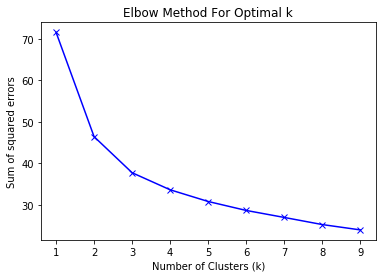

In [57]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of squared errors')
plt.title('Elbow Method For Optimal k')
plt.show()

### We see that for Number of Clusters k=5 we are at a optimum (i.e. the hinge of the elbow can be seen). On increasing the number of clusters beyond 5 the corresponding decrease in the sum of squared errors isn't sufficient enough to justify the computational cost.

### Therefore by elbow method we get the optimum number of clusters as k = 5

## K-Means Clustering with k = 5

In [64]:
# Performing K-Means Clustering using number of clusters K=5
from sklearn.cluster import KMeans

km_5 = KMeans(n_clusters=5, init='random', n_init=100, max_iter=100)
y_km = km_5.fit_predict(X_norm)

### Printing the centroid of the 5 clusters formed.

In [65]:
print(km_5.cluster_centers_)  

[[0.62392241 0.46112557 0.32128799 0.63990524 0.0945495  0.00574713]
 [0.60081845 0.31704852 0.29533594 0.62609051 0.0875576  0.42261905]
 [0.65213178 0.43549803 0.30577679 0.49210012 0.3495874  0.82170543]
 [0.62862319 0.3802297  0.24965257 0.3914703  0.35904628 0.15217391]
 [0.33244681 0.26485347 0.23914311 0.711223   0.09179822 0.0070922 ]]


### Cluster Results

In [66]:
labels = km_5.predict(X_norm)
clusters = {}
n = 0
pat_obs = list(range(1,298))
for item in labels:
        if item in clusters:
            clusters[item].append(pat_obs[n])
        else:
            clusters[item] = [pat_obs[n]]
        n +=1

In [67]:
for item in clusters:
    print("\n")
    print ("Cluster ", item )
    for i in clusters[item]:
        print (i, end = " ")



Cluster  3
1 10 21 28 37 38 48 56 60 65 67 69 70 77 80 108 113 114 119 123 127 136 137 143 154 163 169 174 176 182 192 229 234 242 243 248 249 255 262 264 267 268 270 277 279 296 

Cluster  2
2 3 7 24 25 31 41 43 63 66 73 91 92 97 104 118 121 126 146 155 161 173 175 178 180 186 188 190 191 203 204 211 216 221 230 233 241 269 282 283 289 292 295 

Cluster  4
4 5 6 14 17 19 20 26 29 30 35 36 42 47 50 51 54 58 62 75 79 81 83 85 86 87 89 93 99 100 101 105 109 112 115 117 122 125 128 130 132 133 134 138 139 142 144 145 147 148 151 160 162 167 168 179 185 189 195 196 198 202 208 209 210 213 214 215 218 219 220 223 224 228 235 236 237 238 239 240 251 252 253 261 263 265 266 274 278 280 285 288 291 294 

Cluster  0
8 11 12 15 16 18 22 23 27 33 34 40 44 45 52 61 64 68 71 76 82 84 88 90 94 110 116 129 135 140 141 150 152 156 165 170 171 172 183 187 197 199 201 205 206 207 217 247 256 257 260 272 276 284 286 287 290 293 

Cluster  1
9 13 32 39 46 49 53 55 57 59 72 74 78 95 96 98 102 103 106 107

### Thus on performing the K-Means clustering with number of clusters k = 5 we have patients with labels 1, 10, 21.... etc. belonging to Cluster 3 and patients with labels 2, 3, 7, 24 .... etc. belonging to Cluster 2 and so on as displayed in the result.

## Prevelance of Num = 0 in K-Means Clustering with k = 5

### In the data pre-processing stage we converted the Num Variable to have only two responses 0 and 1. We achieved this by converting the previous observation values of 1-4 in the Num variable to a value of 1 in the Num variable.

In [71]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = X_norm.index.values
cluster_map['cluster'] = km_5.labels_

In [72]:
df_cluster_contents = pd.DataFrame(columns=['Num zero','Num one'])
for j in range(0,5):
    df_temp = cluster_map[cluster_map.cluster == j]
    count_zero = 0
    count_one = 0
    for i in df_temp.index.values:
        x = df.loc[cluster_map.loc[i,'data_index'],'Num']
        if x == 0 :
            count_zero = count_zero + 1
        else:
            count_one = count_one + 1
    df_data = pd.DataFrame(data=[(count_zero, count_one)], columns=['Num zero','Num one'])
    df_cluster_contents = df_cluster_contents.append(df_data, ignore_index = True)

### Printing the different types of responses of Num attribute in the clusters formed using K-Means Clustering of k=5

In [73]:
print (df_cluster_contents)

  Num zero Num one
0       40      18
1       23      33
2        6      37
3       12      34
4       79      15


### Hence in the K-Means Clustering done using k = 5, Num = 0 occurs:
* 40 times in Cluster 0.
* 23 times in Cluster 1.
* 06 times in Cluster 2.
* 12 times in Cluster 3.
* 79 times in Cluster 4.
